# Bike-sharing System Case Study

### Objective of the Case Study

The goal of this case study is to analyze the factors influencing the demand for shared bikes in the American market post the COVID-19 pandemic. BoomBikes, a US-based bike-sharing provider, experienced significant revenue loss during the pandemic and is now looking to strategically plan for recovery once lockdowns are lifted. The company seeks to identify which factors are most significant in predicting bike demand and how these factors influence the demand trends. This analysis will guide management in optimizing their business strategy, catering to market needs, and gaining a competitive edge in the industry.



**Key objectives include**:

- Identifying the variables that significantly impact bike demand.
- Evaluating how well these variables explain the variation in demand.
- Providing insights for demand prediction to help management adapt their strategy to meet market expectations.

## Step 1: Data Understanding

In [6]:
# Importing al libraries required

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Loading the dataset (day.csv)
df_bike_share = pd.read_csv('day.csv')

In [10]:
# Setting the display options for visibility of complete rows and colums.
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)

In [12]:
# Printing the 1st 5 rows of the dataset
df_bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# Printing the last 5 rows of the dataset
df_bike_share.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


**Observations**: This dataset does not contain any headers or footers that need to be cleaned.

In [19]:
# Number of Rows and Columns:
df_bike_share.shape

(730, 16)

In [21]:
# Datatypes of each column
df_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [23]:
# Missing values
df_bike_share.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [25]:
# Columns in the dataset
df_bike_share.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [27]:
# Empty rows
df_bike_share.isnull().all(axis=1).sum()

0

In [29]:
# Duplicate rows
df_bike_share.duplicated().sum()

0

**Observations**:

- There are 730 rows and 16 columns available in this dataset
- There are no missing or NULL values
- There are no empty or duplicate rows in this dataset

## Step 2: Data Cleaning and Manipulation

1. Column `instant` is just an index value so this can be dropped.
2. `dteday` column has date. However, there are separate columns for `year` and `month` so we can remove this column.
3. Both `casual` and `registered` columns contain the count of bikes booked. Our target variable is `cnt' (total count) and not to find any specific category. These two columns can be dropped

In [34]:
# dropping columns (instant, dteday, casual, registered)
df_bike_share.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [36]:
# Remaining no of rows and columns
df_bike_share.shape

(730, 12)

In [38]:
# Remaining columns
df_bike_share.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [40]:
# Renaming few columns for better readability
df_bike_share.rename(columns={'yr': 'year', 'mnth': 'month', 'hum': 'humidity'}, inplace=True)

In [42]:
df_bike_share.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [44]:
# Mapping the season column
df_bike_share.season = df_bike_share.season.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [46]:
# Mapping the month column
df_bike_share.month = df_bike_share.month.map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may',
                                               6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 
                                               11: 'nov', 12: 'dec'})

In [48]:
# Mapping the weekday column
df_bike_share.weekday = df_bike_share.weekday.map({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed',
                                                   4: 'thu', 5: 'fri', 6: 'sat'})

In [50]:
# Mapping the weathersit column
df_bike_share.weathersit = df_bike_share.weathersit.map({1: 'Clear', 2: 'Mist_Cloudy',
                                                         3: 'Light_Snow_Rain', 4: 'Heavy_Rain_Snow'})

In [52]:
# Dataset after mapping
df_bike_share.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [54]:
# Coverting to categorical data type
season_order = ['spring', 'summer', 'fall', 'winter']
df_bike_share['season'] = pd.Categorical(df_bike_share['season'], categories=season_order, ordered=True)

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df_bike_share['month'] = pd.Categorical(df_bike_share['month'], categories=month_order, ordered=True)

weekday_order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
df_bike_share['weekday'] = pd.Categorical(df_bike_share['weekday'], categories=weekday_order, ordered=True)

#weathersit_order = ['Heavy_Rain_Snow', 'Light_Snow_Rain', 'Mist_Cloudy', 'Clear']
df_bike_share['weathersit'] = pd.Categorical(df_bike_share['weathersit'])

In [56]:
df_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


## Step 3: Data Analysis

Based on our data analysis plan, we will be conducting the following steps:
1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

### Univariate Analysis

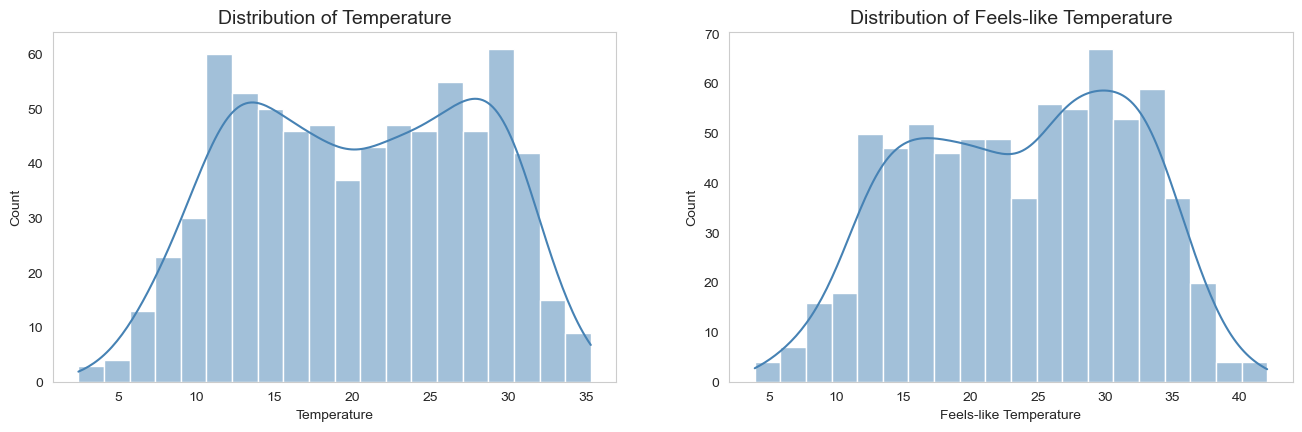

In [61]:
# Univariate analysis of 'temp' and 'atemp'

sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
ax = sns.histplot(data=df_bike_share, x='temp', color='steelblue', kde=True, bins=20)
ax.set_xlabel('Temperature')
ax.set_title('Distribution of Temperature', fontsize= 14)

plt.subplot(2,2,2)
ax = sns.histplot(data=df_bike_share, x='atemp', color='steelblue', kde=True, bins=20)
ax.set_xlabel('Feels-like Temperature')
ax.set_title('Distribution of Feels-like Temperature', fontsize= 14)

plt.show()

**Observation**: Both `temp` and `atemp` have a fairly uniform distribution.

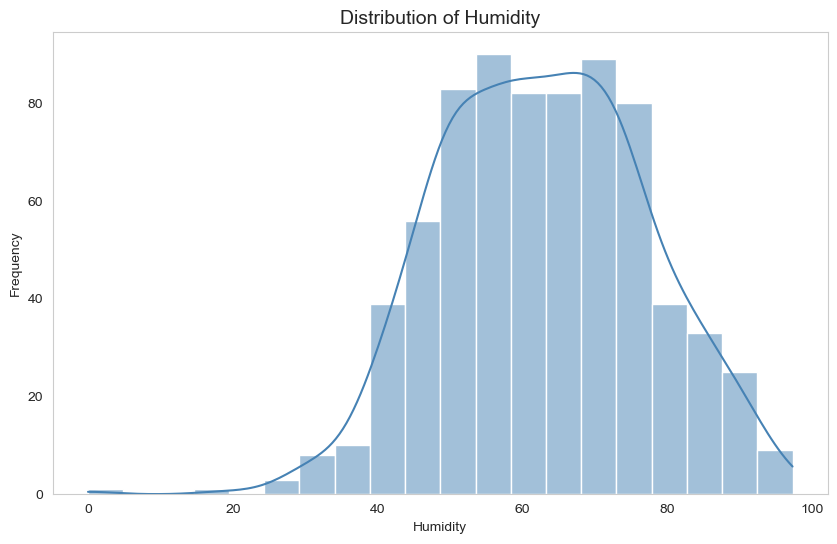

In [64]:
# Univariate analysis of 'humidity'
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10,6))
sns.histplot(data=df_bike_share, x='humidity', kde=True, bins=20, color='steelblue')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Distribution of Humidity', fontsize=14)
plt.show()

**Observation**: Humidity shows a normal distribution, peaking around 50-80%.

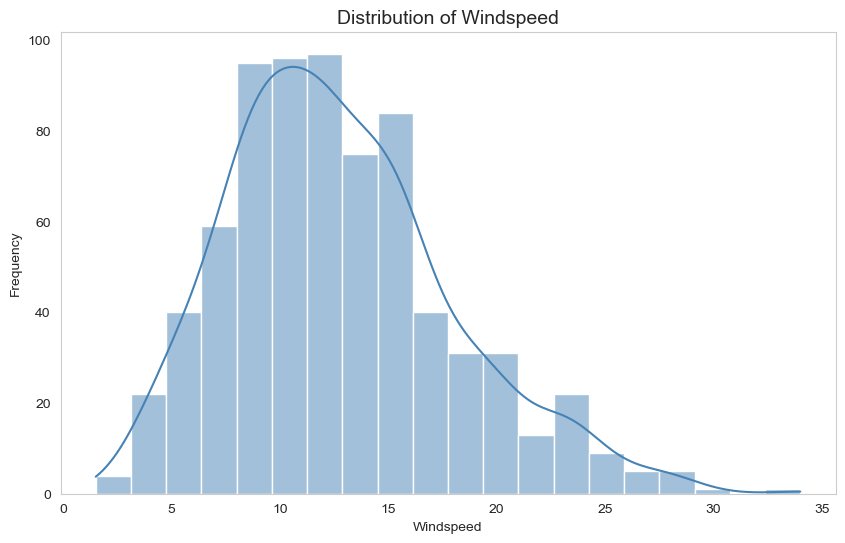

In [67]:
# Univariate analysis of 'windspeed'
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10,6))
sns.histplot(data=df_bike_share, x='windspeed', kde=True, bins=20, color='steelblue')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.title('Distribution of Windspeed', fontsize=14)
plt.show()

**Observation**: Windspeed distribution is slightly right skewed.

### Bivariate Analysis

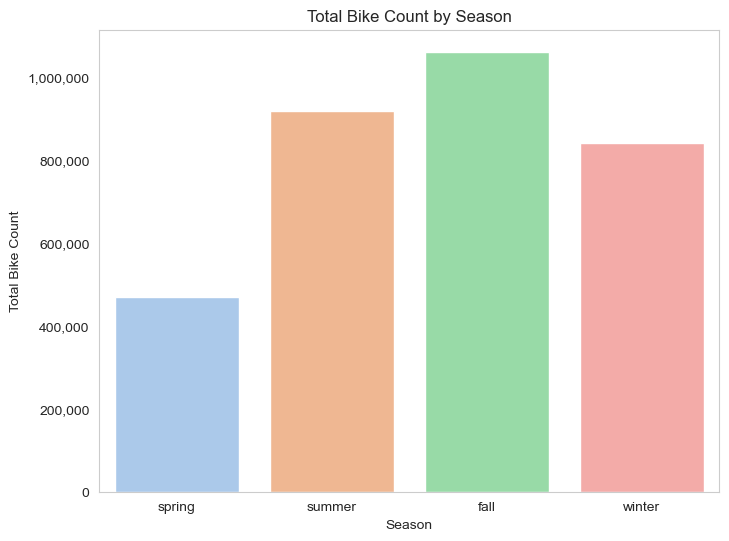

In [71]:
# Analysing Bike Count per Season

# Group the data
seasonal_data = df_bike_share.groupby('season')['cnt'].sum().reset_index()

# Bar plot using seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='season', y='cnt', data=seasonal_data, palette='pastel')

# Add title and labels
ax.set_title('Total Bike Count by Season')
ax.set_xlabel('Season')
ax.set_ylabel('Total Bike Count')

# Format the y-axis ticks with commas for large numbers
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Rotate x-ticks for better readability if needed (here, set to 0 for horizontal)
plt.xticks(rotation=0)

# Show the plot
plt.show()

**Observation**: The highest bike demand is in the `fall` (1,061,129), followed by `summer` and `winter`, with `spring` showing the lowest demand (469,514).

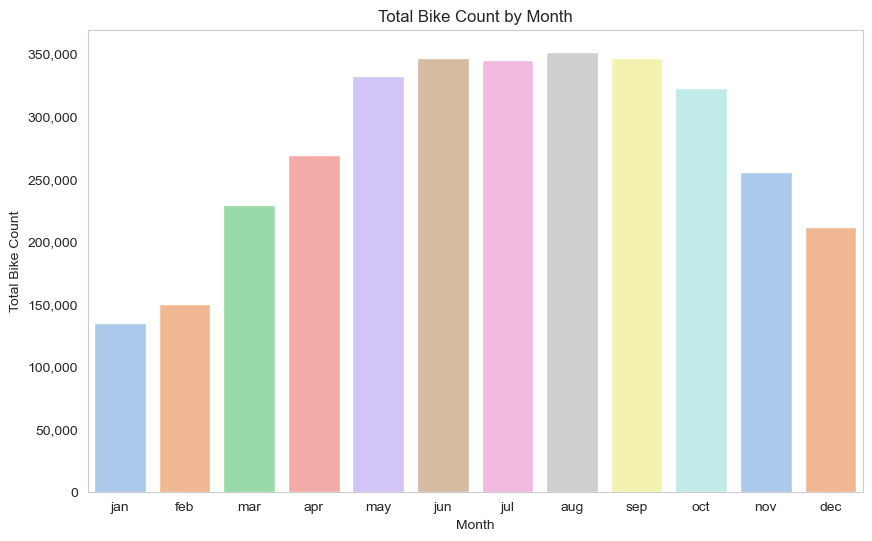

In [74]:
# Analysing Bike Count per Month

# Group the data
monthly_data = df_bike_share.groupby('month')['cnt'].sum().reset_index()

# Bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='month', y='cnt', data=monthly_data, palette='pastel')

# Add title and labels
ax.set_title('Total Bike Count by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Total Bike Count')

# Format the y-axis ticks with commas for large numbers
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Rotate x-ticks for better readability if needed (here, set to 0 for horizontal)
plt.xticks(rotation=0)

# Show the plot
plt.show()

**Observation**: Bike demand shows a clear upward trend from January (134,933) to August (351,194), peaking in the summer months (June to August). After August, there is a gradual decline, with demand dropping to 211,036 by December. This pattern suggests that bike usage is highest during the warmer months (spring and summer) and decreases during the colder months, likely due to weather conditions.

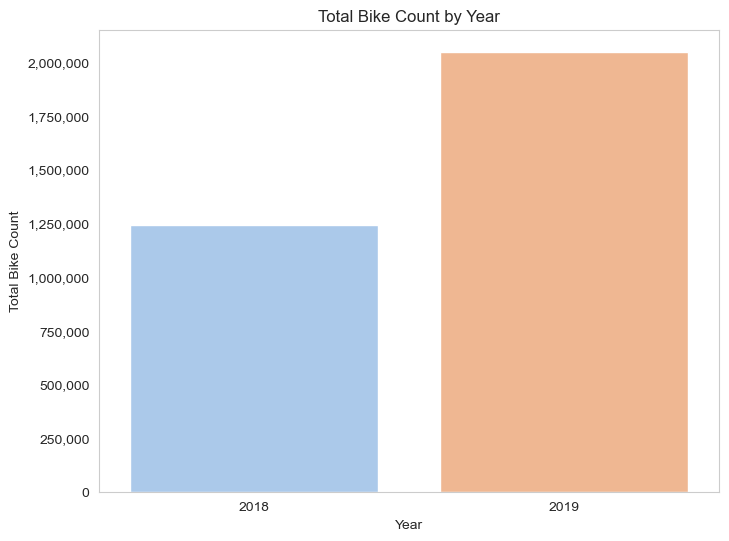

In [77]:
# Analysing Bike Count per Year

# Group by year and sum the bike counts
yearly_data = df_bike_share.groupby('year')['cnt'].sum().reset_index()

# Plotting the bike count per year
plt.figure(figsize=(8, 6))
sns.barplot(x='year', y='cnt', data=yearly_data, palette='pastel')

# Add title and labels
plt.title('Total Bike Count by Year')
plt.xlabel('Year')
plt.ylabel('Total Bike Count')

# Format the y-axis ticks with commas for better readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Add legend for year mapping
plt.xticks(ticks=[0, 1], labels=['2018', '2019'])  # Use custom labels for x-ticks

# Show the plot
plt.show()

**Observations**: Bike count increased from 1,243,103 in 2018 to 2,047,742 in 2019, representing a 64.8% increase. This indicates a significant growth in demand for bike-sharing services.

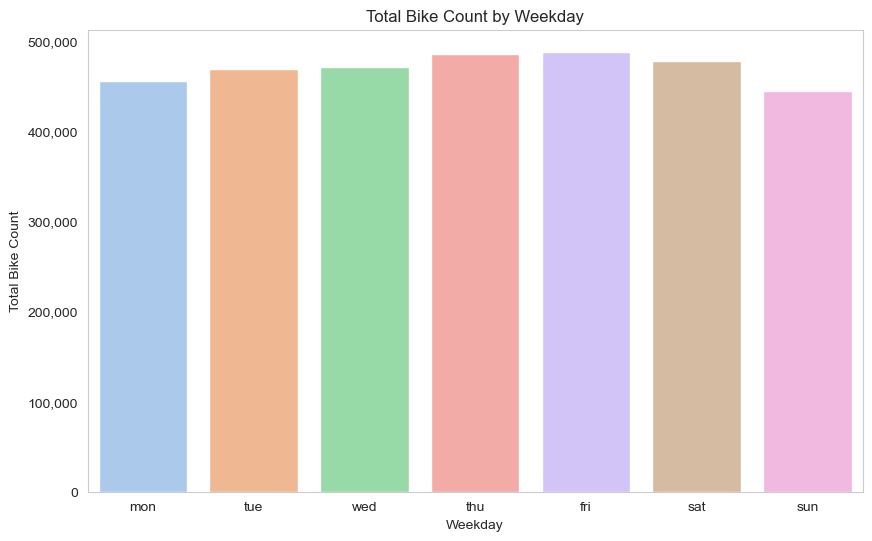

In [80]:
# Analysing Bike Count based on Weekday

# Group by weekday and sum the bike counts
weekday_data = df_bike_share.groupby('weekday')['cnt'].sum().reset_index()

# Plotting the bike count per weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=weekday_data, palette='pastel')

# Add title and labels
plt.title('Total Bike Count by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Bike Count')

# Format the y-axis ticks with commas for better readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Show the plot
plt.show()

**Observation**: The bike counts across weekdays show relatively consistent usage.

In [83]:
df_bike_share.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

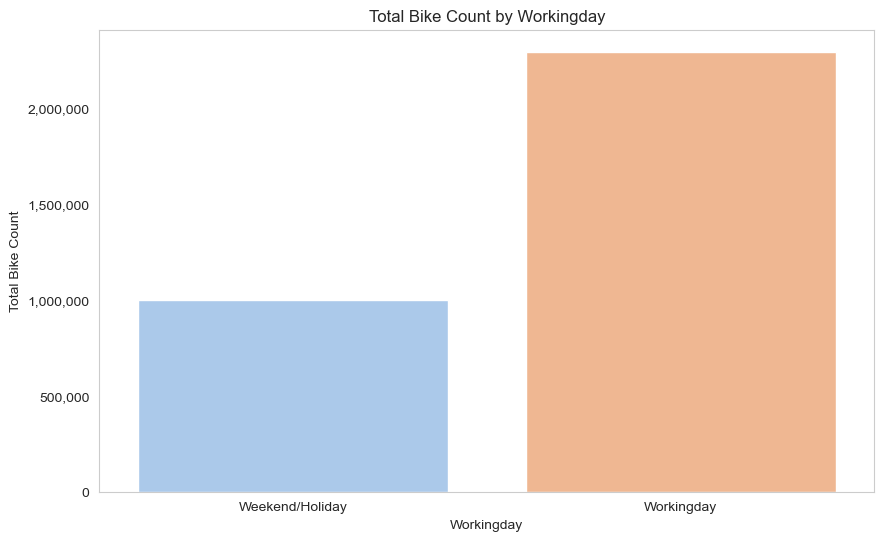

In [85]:
# Analysing Bike Count based on Workingday

# Group by workingday and sum the bike counts
workingday_data = df_bike_share.groupby('workingday')['cnt'].sum().reset_index()

# Plotting the bike count per weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=workingday_data, palette='pastel')

# Add title and labels
plt.title('Total Bike Count by Workingday')
plt.xlabel('Workingday')
plt.ylabel('Total Bike Count')

# Format the y-axis ticks with commas for better readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Show the plot
plt.xticks(ticks=[0, 1], labels=['Weekend/Holiday', 'Workingday'])
plt.show()

**Observation**: Fewer people are booking bikes on weekends and holidays compared to weekdays. 

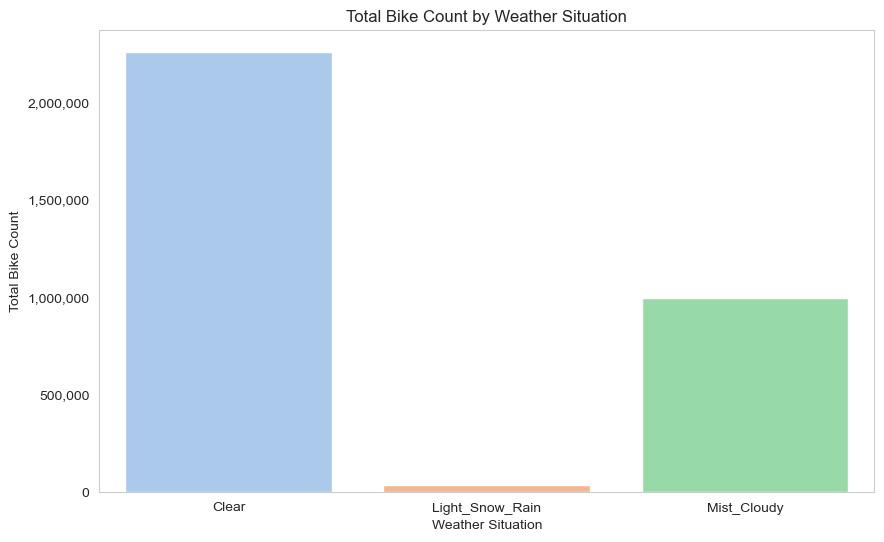

In [88]:
# Analysing Bike Count based on Weathersit

# Group by weatherist and sum the bike counts
weathersit_data = df_bike_share.groupby('weathersit')['cnt'].sum().reset_index()

# Plotting the bike count per weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weathersit_data, palette='pastel')

# Add title and labels
plt.title('Total Bike Count by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Bike Count')

# Format the y-axis ticks with commas for better readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

**Observation**: The majority of bike counts occur in clear weather with a total of 2,257,952 rides, significantly outpacing the counts during misty/cloudy conditions (995,024) and light snow/rain (37,869). This indicates that clear weather conditions are strongly preferred for bike usage, while adverse weather conditions like light snow or rain lead to drastically lower demand for bike-sharing services.

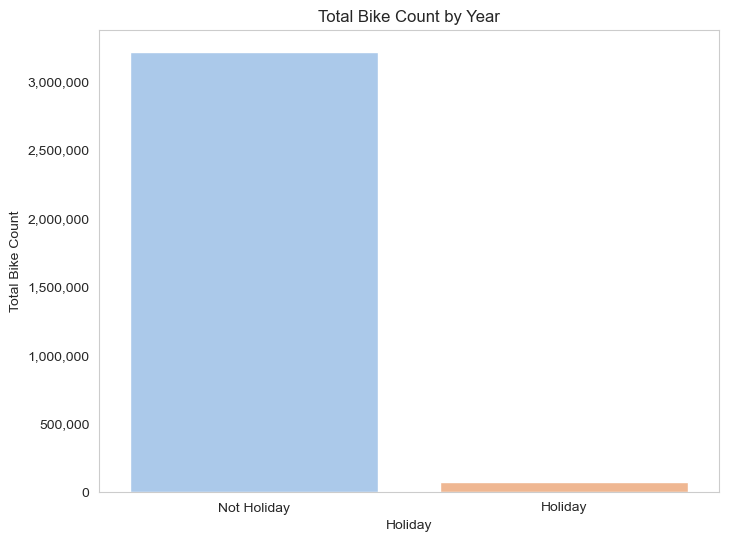

In [91]:
# Analysing Bike Count based on Holiday

# Group by year and sum the bike counts
holiday_data = df_bike_share.groupby('holiday')['cnt'].sum().reset_index()

# Plotting the bike count per year
plt.figure(figsize=(8, 6))
sns.barplot(x='holiday', y='cnt', data=holiday_data, palette='pastel')

# Add title and labels
plt.title('Total Bike Count by Year')
plt.xlabel('Holiday')
plt.ylabel('Total Bike Count')

# Format the y-axis ticks with commas for better readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Add legend for year mapping
plt.xticks(ticks=[0, 1], labels=['Not Holiday', 'Holiday'])  # Use custom labels for x-ticks

# Show the plot
plt.show()

**Observation**: The majority of bike counts occur on days that are not holidays.

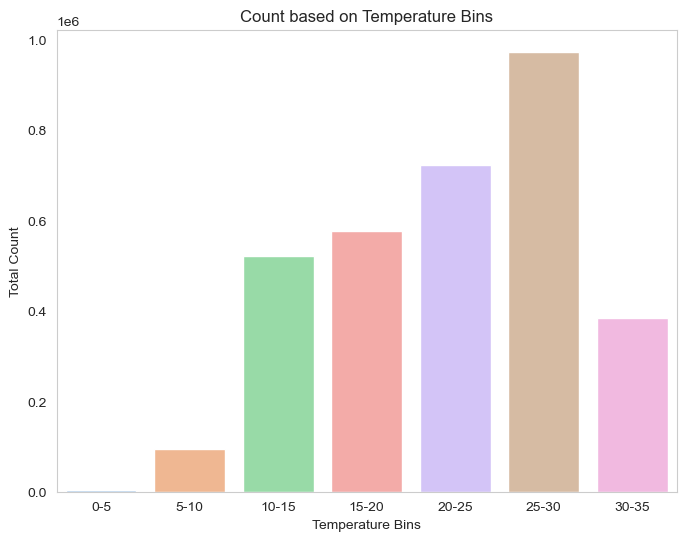

In [94]:
# copy the dataframe
df_temp = df_bike_share.copy()

# Define the bins for temperature
bins = [0, 5, 10, 15, 20, 25, 30, 35]  # Define temperature intervals (bins)
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35']  # Labels for each bin

# Use pd.cut to bin the temperature data
df_temp['temp_bin'] = pd.cut(df_temp['temp'], bins=bins, labels=labels)

# Group by the temperature bins and sum the counts
temp_bin_data = df_temp.groupby('temp_bin')['cnt'].sum().reset_index()

# Plot the result using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='temp_bin', y='cnt', data=temp_bin_data, palette='pastel')

# Add labels and title
plt.xlabel('Temperature Bins')
plt.ylabel('Total Count')
plt.title('Count based on Temperature Bins')

# Show the plot
plt.show()

**Observation**: Bike counts are highest in the 25-30°C temperature range, with a total of 973,460 rides, followed closely by the 20-25°C range (725,046). There is a noticeable drop in usage at temperatures above 30°C (384,677) and below 20°C. This suggests that moderate temperatures, particularly between 20°C and 30°C, are optimal for bike usage, while very hot or cooler conditions lead to reduced demand.

### Multivariate Analysis

In [98]:
# Defining the list of continuos columns
continuos_col = ['cnt', 'temp', 'atemp', 'humidity', 'windspeed']

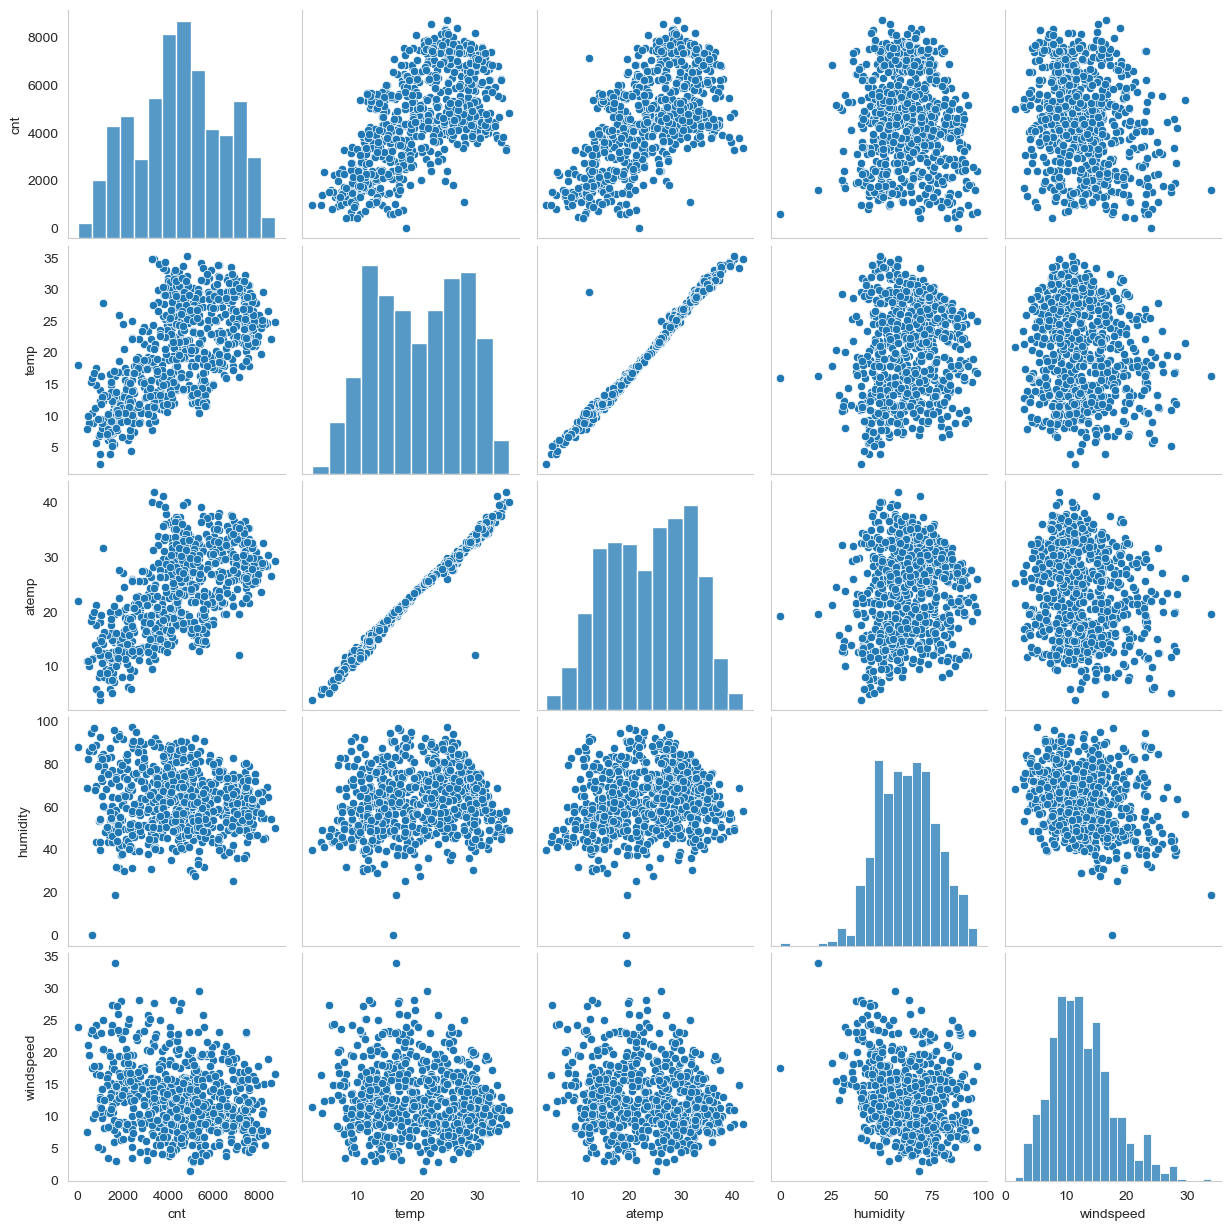

In [100]:
# Using pairplot to visualize the relationships between the clumns
sns.pairplot(data=df_bike_share, vars=continuos_col)
plt.show()

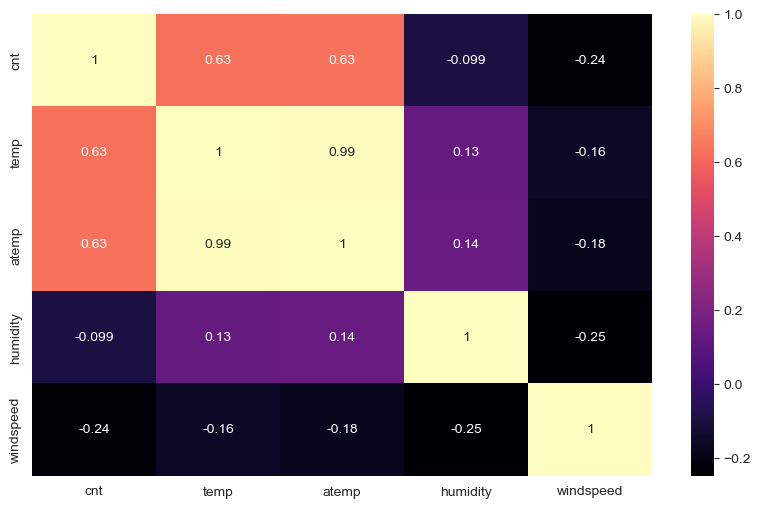

In [102]:
# Visualising using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_bike_share[continuos_col].corr(), annot=True, cmap="magma")
plt.show()

**Observation**: The correlation between `temp` and `atemp` is 0.99, suggesting that these two variables are very similar. Both `temp` and `atemp` show a strong positive correlation with `cnt`, while `humidity` and `windspeed` have a negative correlation with `cnt`.

## Step 4: Data Preparation for Modeling

In [106]:
df_bike_share.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [108]:
# Defining the list for categorical columns with more than 2 categories
multi_cat_cols = ['season', 'month', 'weekday', 'weathersit']

In [110]:
# Creating dummy variables for multi catergorical columns
df_bike_share = pd.get_dummies(df_bike_share, columns= multi_cat_cols, drop_first=True, dtype=int)

df_bike_share.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_summer,season_fall,season_winter,month_feb,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weekday_sun,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [112]:
df_bike_share.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'season_summer', 'season_fall', 'season_winter',
       'month_feb', 'month_mar', 'month_apr', 'month_may', 'month_jun',
       'month_jul', 'month_aug', 'month_sep', 'month_oct', 'month_nov',
       'month_dec', 'weekday_tue', 'weekday_wed', 'weekday_thu', 'weekday_fri',
       'weekday_sat', 'weekday_sun', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [114]:
df_bike_share.shape

(730, 30)

In [116]:
df_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   humidity                    730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_summer               730 non-null    int64  
 9   season_fall                 730 non-null    int64  
 10  season_winter               730 non-null    int64  
 11  month_feb                   730 non-null    int64  
 12  month_mar                   730 non-null    int64  
 13  month_apr                   730 non

### Splitting into train and test

In [119]:
# Splitting the data into training and testing sets
df_train, df_test = train_test_split(df_bike_share, train_size=0.7, random_state=100) # 70% train and 30% test
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling the Features 

In [122]:
# Continuos Variables
continuos_col

['cnt', 'temp', 'atemp', 'humidity', 'windspeed']

In [124]:
#1. Instantiate an object
scaler = MinMaxScaler()

#2. Fit scaler on the continuos columns
df_train[continuos_col] = scaler.fit_transform(df_train[continuos_col])

# Data after rescaling
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_summer,season_fall,season_winter,month_feb,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weekday_sun,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [126]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_summer,season_fall,season_winter,month_feb,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weekday_sun,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,0.247059,0.066667,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314,0.131373,0.158824,0.133333,0.127451,0.154902,0.143137,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,0.431725,0.249689,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131,0.338139,0.365870,0.340268,0.333805,0.362166,0.350557,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 5: Training the Model

In [130]:
# Splitting df_train into X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_summer,season_fall,season_winter,month_feb,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weekday_sun,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


### Model Training - Iteration 1

In [133]:
# Creating 1st Linear Regression Model with all features

# Add a constant
X_train_sm = sm.add_constant(X_train)

# Create the model
lr = sm.OLS(y_train, X_train_sm)

# Fitting the model
lr_model = lr.fit()

# Display OLS results
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.81e-180
Time:                        11:13:52   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1479      0.023      6.306      0.000       0.102       0.194
year                           0.2325      0.008     28.794      0.000       0.217       0.248
holiday                       -0.0238      0.021     -1.124      0.262      -0.065       0.018
workingday                     0.0616      0.012      5.296      0.000       0.039       0.084
temp                           0.3880      0.142      2.727      0.007       0.108       0.668
atemp                          0.0590      0.138      0.426      0.670      -0.213       0.331
humidity                      -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_summer                  0.0877      0.024      3.713      0.000       0.041       0.134
season_fall                    0.0454      0.030      1.511      0.131      -0.014       0.104
season_winter                  0.1524      0.026      5.866      0.000       0.101       0.203
month_feb                      0.0307      0.021      1.489      0.137      -0.010       0.071
month_mar                      0.0646      0.022      2.886      0.004       0.021       0.109
month_apr                      0.0631      0.034      1.876      0.061      -0.003       0.129
month_may                      0.0886      0.036      2.446      0.015       0.017       0.160
month_jun                      0.0691      0.039      1.776      0.076      -0.007       0.145
month_jul                      0.0304      0.044      0.692      0.489      -0.056       0.117
month_aug                      0.0853      0.042      2.038      0.042       0.003       0.168
month_sep                      0.1498      0.037      4.006      0.000       0.076       0.223
month_oct                      0.0708      0.035      2.050      0.041       0.003       0.139
month_nov                      0.0232      0.033      0.707      0.480      -0.041       0.088
month_dec                      0.0188      0.027      0.708      0.479      -0.033       0.071
weekday_tue                    0.0032      0.015      0.208      0.835      -0.027       0.033
weekday_wed                    0.0157      0.015      1.074      0.283      -0.013       0.044
weekday_thu                    0.0119      0.015      0.785      0.433      -0.018       0.042
weekday_fri                    0.0216      0.015      1.401      0.162      -0.009       0.052
weekday_sat                    0.0821      0.011      7.247      0.000       0.060       0.104
weekday_sun                    0.0279      0.012      2.345      0.019       0.005       0.051
weathersit_Light_Snow_Rain    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
weathersit_Mist_Cloudy        -0.0595      

In [135]:
# Creating a function to calculate VIF
def calculateVIF(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [137]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train)

,Features,VIF
3,temp,66.90
4,atemp,56.03
2,workingday,40.63
8,season_fall,11.33
16,month_aug,9.89
15,month_jul,8.85
25,weekday_sat,8.76
26,weekday_sun,8.62
9,season_winter,8.15
14,month_jun,6.93


### Feature Selection Using RFE

In [140]:
# Create an instance of the Linear Regression model
lm = LinearRegression()

# Fit the model on the training data (X_train, y_train)
lm.fit(X_train, y_train)

# Create an RFE (Recursive Feature Elimination) object
# Specify that we want to select 15 features
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit the RFE object on the training data
# This will recursively eliminate less important features and select the top 15 features
rfe = rfe.fit(X_train, y_train)

In [142]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 14),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', False, 2),
 ('season_winter', True, 1),
 ('month_feb', False, 7),
 ('month_mar', False, 3),
 ('month_apr', False, 6),
 ('month_may', False, 4),
 ('month_jun', False, 5),
 ('month_jul', False, 12),
 ('month_aug', True, 1),
 ('month_sep', True, 1),
 ('month_oct', True, 1),
 ('month_nov', False, 8),
 ('month_dec', False, 9),
 ('weekday_tue', False, 15),
 ('weekday_wed', False, 11),
 ('weekday_thu', False, 13),
 ('weekday_fri', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [144]:
# Creating a list of selected variables by RFE
sel_features = X_train.columns[rfe.support_]
print(sel_features)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_summer', 'season_winter', 'month_aug', 'month_sep', 'month_oct',
       'weekday_sat', 'weekday_sun', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')


In [146]:
# Columns rejected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'season_fall', 'month_feb', 'month_mar', 'month_apr',
       'month_may', 'month_jun', 'month_jul', 'month_nov', 'month_dec',
       'weekday_tue', 'weekday_wed', 'weekday_thu', 'weekday_fri'],
      dtype='object')

### Model Training - Iteration 2

In [149]:
# Creating 1st Linear Regression Model with all features selected by RFE
X_train_rfe = X_train[sel_features]
# Add a constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create the model
lr = sm.OLS(y_train, X_train_sm)

# Fitting the model
lr_model = lr.fit()

# Display OLS results
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          8.70e-192
Time:                        11:14:51   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1640      0.022      7.507      0.000       0.121       0.207
year                           0.2292      0.008     28.712      0.000       0.214       0.245
holiday                       -0.0250      0.021     -1.205      0.229      -0.066       0.016
workingday                     0.0749      0.009      8.548      0.000       0.058       0.092
temp                           0.5309      0.022     24.146      0.000       0.488       0.574
humidity                      -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed                     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
season_summer                  0.1049      0.011      9.778      0.000       0.084       0.126
season_winter                  0.1349      0.012     11.306      0.000       0.111       0.158
month_aug                      0.0557      0.016      3.457      0.001       0.024       0.087
month_sep                      0.1252      0.016      7.757      0.000       0.093       0.157
month_oct                      0.0385      0.017      2.230      0.026       0.005       0.072
weekday_sat                    0.0834      0.011      7.657      0.000       0.062       0.105
weekday_sun                    0.0307      0.012      2.670      0.008       0.008       0.053
weathersit_Light_Snow_Rain    -0.2470      0.026     -9.484      0.000      -0.298      -0.196
weathersit_Mist_Cloudy        -0.0568      0.010     -5.482      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                     1.41e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.46e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [151]:
# Calculating VIFs for the feature variables selected by RFE
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,31.45
11,weekday_sat,7.77
12,weekday_sun,7.65
1,holiday,2.14
4,humidity,1.87
7,season_winter,1.71
3,temp,1.59
14,weathersit_Mist_Cloudy,1.56
10,month_oct,1.49
8,month_aug,1.46


**Observation**: The `workingday` column has a VIF greater than 5, so it will be removed in the next model iteration.

### Model Training - Iteration 3

In [155]:
# Removing 'workingday' feature
X_train_new = X_train_rfe.drop(['workingday'], axis=1)

In [157]:
#Creating model without 'weekday_sun' column

# Add a constant
X_train_sm = sm.add_constant(X_train_new)

# Create the model
lr = sm.OLS(y_train, X_train_sm)

# Fitting the model
lr_model = lr.fit()

# Display OLS results
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          8.70e-192
Time:                        11:15:28   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2389      0.027      8.907      0.000       0.186       0.292
year                           0.2292      0.008     28.712      0.000       0.214       0.245
holiday                       -0.0999      0.025     -3.942      0.000      -0.150      -0.050
temp                           0.5309      0.022     24.146      0.000       0.488       0.574
humidity                      -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed                     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
season_summer                  0.1049      0.011      9.778      0.000       0.084       0.126
season_winter                  0.1349      0.012     11.306      0.000       0.111       0.158
month_aug                      0.0557      0.016      3.457      0.001       0.024       0.087
month_sep                      0.1252      0.016      7.757      0.000       0.093       0.157
month_oct                      0.0385      0.017      2.230      0.026       0.005       0.072
weekday_sat                    0.0085      0.011      0.765      0.445      -0.013       0.030
weekday_sun                   -0.0442      0.012     -3.829      0.000      -0.067      -0.022
weathersit_Light_Snow_Rain    -0.2470      0.026     -9.484      0.000      -0.298      -0.196
weathersit_Mist_Cloudy        -0.0568      0.010     -5.482      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
# Calculating VIFs
calculateVIF(X_train_new)

,Features,VIF
3,humidity,14.75
2,temp,9.88
4,windspeed,3.65
6,season_winter,2.25
13,weathersit_Mist_Cloudy,2.16
0,year,2.02
5,season_summer,1.84
7,month_aug,1.60
9,month_oct,1.60
8,month_sep,1.34


**Observation**: The `humidity' feature has VIF greater than 5 so it will be removed in the next model iteration.

### Model Training - Iteration 4

In [163]:
# Removing 'humidity' feature
X_train_new = X_train_new.drop(['humidity'], axis=1)

In [165]:
#Creating model without 'humidity' column

# Add a constant
X_train_sm = sm.add_constant(X_train_new)

# Create the model
lr = sm.OLS(y_train, X_train_sm)

# Fitting the model
lr_model = lr.fit()

# Display OLS results
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.97e-188
Time:                        11:15:55   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1411      0.017      8.403      0.000       0.108       0.174
year                           0.2331      0.008     28.769      0.000       0.217       0.249
holiday                       -0.1014      0.026     -3.924      0.000      -0.152      -0.051
temp                           0.5106      0.022     23.229      0.000       0.467       0.554
windspeed                     -0.1530      0.025     -6.183      0.000      -0.202      -0.104
season_summer                  0.1019      0.011      9.325      0.000       0.080       0.123
season_winter                  0.1267      0.012     10.524      0.000       0.103       0.150
month_aug                      0.0539      0.016      3.281      0.001       0.022       0.086
month_sep                      0.1185      0.016      7.226      0.000       0.086       0.151
month_oct                      0.0343      0.018      1.950      0.052      -0.000       0.069
weekday_sat                    0.0105      0.011      0.926      0.355      -0.012       0.033
weekday_sun                   -0.0473      0.012     -4.026      0.000      -0.070      -0.024
weathersit_Light_Snow_Rain    -0.2929      0.025    -11.930      0.000      -0.341      -0.245
weathersit_Mist_Cloudy        -0.0840      0.009     -9.676      0.000      -0.101      -0.067
==============================================================================
Omnibus:                       69.409   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.594
Skew:                          -0.699   Prob(JB):                     3.32e-38
Kurtosis:                       5.484   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
# Calculating VIFs
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.22
3,windspeed,3.22
0,year,2.01
5,season_winter,1.94
4,season_summer,1.83
6,month_aug,1.60
8,month_oct,1.59
12,weathersit_Mist_Cloudy,1.49
7,month_sep,1.34
9,weekday_sat,1.22


**Observation**: The `weekday_sat' feature has p-value greater than 0.05 so it will be removed in the next model iteration.

### Model Training - Iteration 5

In [171]:
# Removing 'weekday_sat' feature
X_train_new = X_train_new.drop(['weekday_sat'], axis=1)

In [173]:
#Creating model without 'weekday_sat' column

# Add a constant
X_train_sm = sm.add_constant(X_train_new)

# Create the model
lr = sm.OLS(y_train, X_train_sm)

# Fitting the model
lr_model = lr.fit()

# Display OLS results
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.00e-189
Time:                        11:16:32   Log-Likelihood:                 507.32
No. Observations:                 510   AIC:                            -988.6
Df Residuals:                     497   BIC:                            -933.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1431      0.017      8.606      0.000       0.110       0.176
year                           0.2328      0.008     28.758      0.000       0.217       0.249
holiday                       -0.1035      0.026     -4.021      0.000      -0.154      -0.053
temp                           0.5099      0.022     23.214      0.000       0.467       0.553
windspeed                     -0.1519      0.025     -6.147      0.000      -0.200      -0.103
season_summer                  0.1018      0.011      9.316      0.000       0.080       0.123
season_winter                  0.1268      0.012     10.542      0.000       0.103       0.150
month_aug                      0.0542      0.016      3.299      0.001       0.022       0.087
month_sep                      0.1186      0.016      7.232      0.000       0.086       0.151
month_oct                      0.0344      0.018      1.955      0.051      -0.000       0.069
weekday_sun                   -0.0493      0.012     -4.265      0.000      -0.072      -0.027
weathersit_Light_Snow_Rain    -0.2929      0.025    -11.931      0.000      -0.341      -0.245
weathersit_Mist_Cloudy        -0.0841      0.009     -9.684      0.000      -0.101      -0.067
==============================================================================
Omnibus:                       66.333   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.035
Skew:                          -0.659   Prob(JB):                     1.20e-37
Kurtosis:                       5.503   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
# Calculating VIFs
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.19
3,windspeed,3.14
0,year,2.01
5,season_winter,1.93
4,season_summer,1.83
6,month_aug,1.60
8,month_oct,1.59
11,weathersit_Mist_Cloudy,1.49
7,month_sep,1.34
9,weekday_sun,1.17


**Observation**: The `month_oct` feature has p-value greater than 0.05 so it will be removed in the next model iteration.

### Model Training - Iteration 6

In [179]:
# Removing 'month_oct' feature
X_train_new = X_train_new.drop(['month_oct'], axis=1)

In [181]:
#Creating model without 'month_oct' column

# Add a constant
X_train_sm = sm.add_constant(X_train_new)

# Create the model
lr = sm.OLS(y_train, X_train_sm)

# Fitting the model
lr_model = lr.fit()

# Display OLS results
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.8
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          8.46e-190
Time:                        11:17:04   Log-Likelihood:                 505.37
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     498   BIC:                            -935.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1387      0.017      8.394      0.000       0.106       0.171
year                           0.2325      0.008     28.639      0.000       0.217       0.248
holiday                       -0.1044      0.026     -4.047      0.000      -0.155      -0.054
temp                           0.5181      0.022     23.965      0.000       0.476       0.561
windspeed                     -0.1497      0.025     -6.048      0.000      -0.198      -0.101
season_summer                  0.1002      0.011      9.173      0.000       0.079       0.122
season_winter                  0.1384      0.011     13.172      0.000       0.118       0.159
month_aug                      0.0512      0.016      3.123      0.002       0.019       0.083
month_sep                      0.1137      0.016      6.996      0.000       0.082       0.146
weekday_sun                   -0.0483      0.012     -4.172      0.000      -0.071      -0.026
weathersit_Light_Snow_Rain    -0.2872      0.024    -11.749      0.000      -0.335      -0.239
weathersit_Mist_Cloudy        -0.0831      0.009     -9.563      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       58.082   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.254
Skew:                          -0.602   Prob(JB):                     9.52e-31
Kurtosis:                       5.249   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
# Calculating VIFs
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,3.13
0,year,2.00
4,season_summer,1.82
6,month_aug,1.59
5,season_winter,1.49
10,weathersit_Mist_Cloudy,1.49
7,month_sep,1.31
8,weekday_sun,1.17
9,weathersit_Light_Snow_Rain,1.08


**Observation**: The `temp` feature has a slightly higher VIF, but since our EDA revealed a strong correlation between `temp` and `cnt`, we are not removing this variable. This is the final list of all the features.

In [186]:
# Displaying the final list of features and their coefficient values
lr_model.params

const                         0.138708
year                          0.232473
holiday                      -0.104440
temp                          0.518115
windspeed                    -0.149731
season_summer                 0.100242
season_winter                 0.138412
month_aug                     0.051237
month_sep                     0.113697
weekday_sun                  -0.048309
weathersit_Light_Snow_Rain   -0.287190
weathersit_Mist_Cloudy       -0.083105
dtype: float64

## Step 5: Residual Analysis

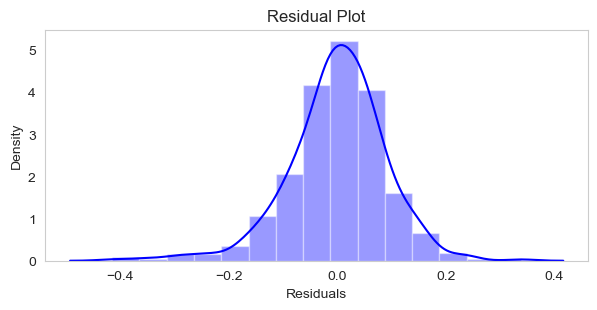

In [189]:
# Plotting residuals to check for any patterns and if mean is 0
y_train_pred=lr_model.predict(X_train_sm)

res=y_train-y_train_pred

plt.figure(figsize=(7, 3))
sns.distplot(res, color="blue", bins = 15, kde=True)
plt.xlabel('Residuals')
plt.title('Residual Plot')
plt.show()

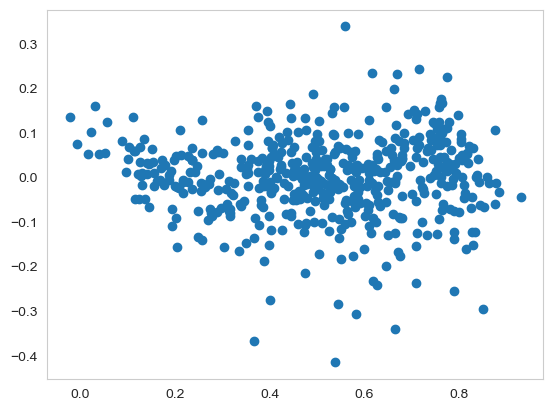

In [191]:
# Scatter plot to look for patterns in residual.
plt.scatter(y_train_pred, res)
plt.show()

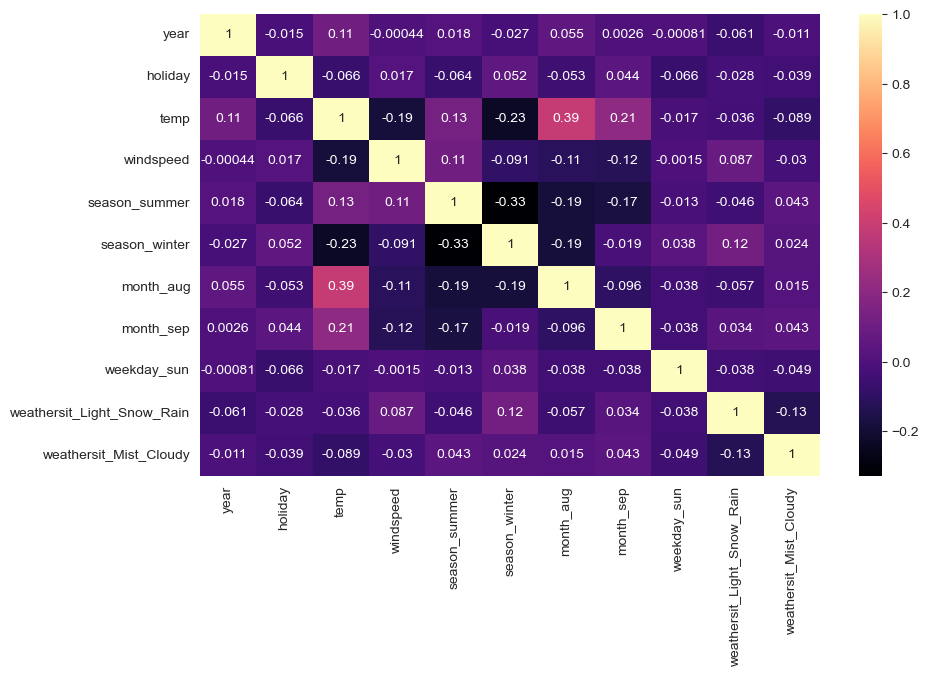

In [193]:
# Visualising using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(X_train_new.corr(), annot=True, cmap="magma")
plt.show()

**Observation**: There is no multicolinearity.

## Step 6: Model Prediction

In [197]:
# Test dataset
df_test.shape

(220, 30)

In [199]:
# Fit scaler on the continuos columns
df_test[continuos_col] = scaler.transform(df_test[continuos_col])

# Data after rescaling
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_summer,season_fall,season_winter,month_feb,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weekday_sun,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [201]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_summer,season_fall,season_winter,month_feb,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weekday_sun,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,0.100000,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364,0.168182,0.100000,0.163636,0.177273,0.118182,0.145455,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,0.300684,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541,0.374881,0.300684,0.370789,0.382770,0.323559,0.353363,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [203]:
# Splitting df_test into X_train and y_train
y_test=df_test.pop('cnt')
X_test=df_test
X_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_summer,season_fall,season_winter,month_feb,month_mar,month_apr,month_may,month_jun,month_jul,month_aug,month_sep,month_oct,month_nov,month_dec,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weekday_sun,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [205]:
# Creating new list for selected final features
final_features = X_train_new.columns
final_features

Index(['year', 'holiday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'month_aug', 'month_sep', 'weekday_sun',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [207]:
# Removing the remaing featured from X_test dataset
X_test = X_test[final_features]
X_test.head()

,year,holiday,temp,windspeed,season_summer,season_winter,month_aug,month_sep,weekday_sun,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
184,0,1,0.831783,0.084219,0,0,0,0,0,0,1
535,1,0,0.901354,0.153728,1,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,0,0,0,1
221,0,0,0.881625,0.339570,0,0,1,0,0,0,0
152,0,0,0.817246,0.537414,1,0,0,0,0,0,0


In [209]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

In [211]:
# Predicting y_test dataset
y_pred=lr_model.predict(X_test_sm)

In [213]:
# Calculate R-squared on Test Dataset
r2 = r2_score(y_test, y_pred)
print("R-squared on test set:", r2)

R-squared on test set: 0.796952315658357


## Step 7: Model Evaluation

In [216]:
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test, y_pred)
print('Training r2_Score:', round(r2_train,4))
print('Test r2_Score:', round(r2_test,4))

Training r2_Score: 0.8395
Test r2_Score: 0.797


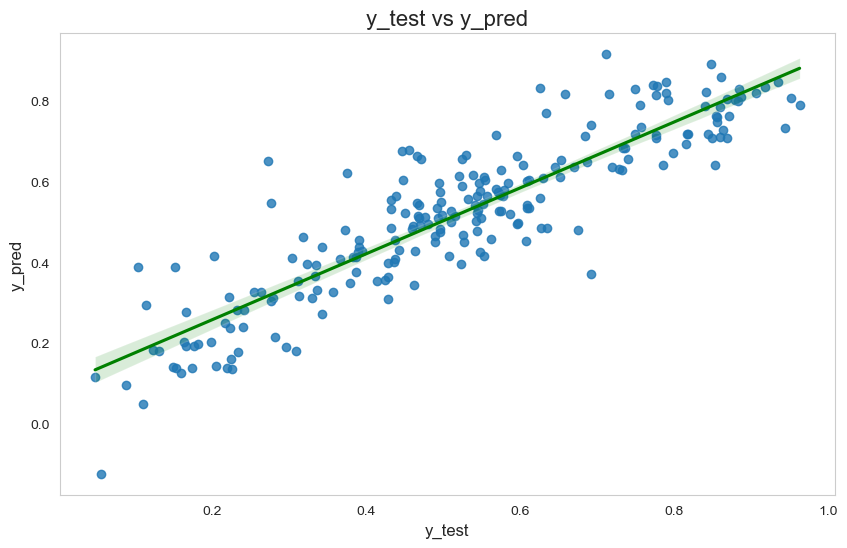

In [218]:
# Plotting y_test and y_pred to understand the spread
plt.figure(figsize=(10,6))
plt.title('y_test vs y_pred', fontsize = 16) 
sns.regplot(x = y_test,y = y_pred, line_kws={'color':'green'})
plt.xlabel('y_test', fontsize = 12)
plt.ylabel('y_pred', fontsize = 12) 
plt.show()

In [220]:
# Coefficients of the final list of features
round(lr_model.params,4)

const                         0.1387
year                          0.2325
holiday                      -0.1044
temp                          0.5181
windspeed                    -0.1497
season_summer                 0.1002
season_winter                 0.1384
month_aug                     0.0512
month_sep                     0.1137
weekday_sun                  -0.0483
weathersit_Light_Snow_Rain   -0.2872
weathersit_Mist_Cloudy       -0.0831
dtype: float64

## Conclusion

**The equation of best fitted line is**:
$ cnt = 0.1387 + 0.2325 \times year - 0.1044 \times holiday + 0.5181 \times temp - 0.1497 \times windspeed + 0.1002 \times season\_summer + 0.1384 \times season\_winter + 0.0512 \times month\_aug + 0.1137 \times month\_sep - 0.0483 \times weekday\_sun - 0.2872 \times weathersit\_Light\_Snow\_Rain - 0.0831 \times weathersit\_Mist\_Cloudy $

Here are a few observations based on the equation of the best-fitted line:

**Year**: The positive coefficient (0.2325) indicates that bike counts increased over time from 2018 to 2019, contributing positively to the demand.

**Holiday**: The negative coefficient (-0.1044) suggests that bike usage decreases on holidays compared to regular days.

**Temperature (temp)**: The strong positive coefficient (0.5181) implies that higher temperatures are associated with an increase in bike demand, reinforcing that people prefer biking in warmer weather.

**Windspeed**: The negative coefficient (-0.1497) shows that higher wind speeds reduce bike usage, as windier conditions might deter people from biking.

**Season (summer & winter)**: Both summer (0.1002) and winter (0.1384) have positive coefficients, indicating that demand is generally higher in these seasons compared to spring (which is the baseline in this equation).

**Month (August & September)**: The months of August (0.0512) and September (0.1137) positively impact bike demand, especially in September.

**Weekday (Sunday)**: The negative coefficient for Sunday (-0.0483) suggests that bike usage is slightly lower on Sundays compared to other weekdays.

**Weather (Light Snow/Rain and Mist/Cloudy)**: Both adverse weather conditions (light snow/rain with -0.2872 and mist/cloudy with -0.0831) negatively affect bike demand, indicating that bad weather discourages biking. Riders prefer clear weather for bike riding.

In summary, variables like temperature, year, and certain months/seasons contribute positively to bike demand, while factors such as holidays, windspeed, and bad weather conditions negatively impact it.